In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neural_network import *
from sklearn.metrics import *

In [52]:
data = pd.read_csv('./heart2.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [53]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [54]:
# data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].mode()[0] )
# data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mode()[0] )
# data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].mode()[0] )
# data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mode()[0] )
# data['BMI'] = data['BMI'].fillna(data['BMI'].mode()[0] )
# data['Age'] = data['Age'].fillna(data['Age'].mode()[0] )
# data['Outcome'] = data['Outcome'].fillna(7 )
# data.head()

In [55]:
data = data[data['target'] != 7]
print(np.unique(data['target']))
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
print(np.unique(data['target'], return_counts=True))

[0 1]
(array([0, 1]), array([499, 526]))


In [56]:
x_var = data.drop(columns='target', axis=1)
y_var = data['target']
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(6,5), learning_rate_init=0.01, verbose=False, random_state=42)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=42)

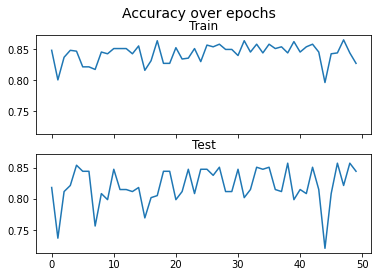

In [57]:

TRAIN_SAMPLES = x_train.shape[0]
EPOCHS = 50
BATCH = 128
CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
epoch = 0

while epoch < EPOCHS:
    random_perm = np.random.permutation(x_train.shape[0])
    mini_batch_index = 0
    
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index+BATCH]
        mlp.partial_fit(x_train.iloc[indices],y_train.iloc[indices],classes=CLASSES)
        mini_batch_index += BATCH
        
        if mini_batch_index >= TRAIN_SAMPLES:
            break
    
    scores_train.append(mlp.score(x_train,y_train))
    scores_test.append(mlp.score(x_test,y_test))
    epoch += 1
    
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


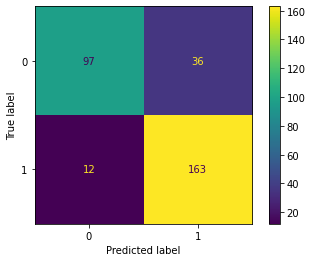

In [58]:
predictions = mlp.predict(x_test)
plot_confusion_matrix(mlp, x_test, y_test)

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       133
           1       0.82      0.93      0.87       175

    accuracy                           0.84       308
   macro avg       0.85      0.83      0.84       308
weighted avg       0.85      0.84      0.84       308



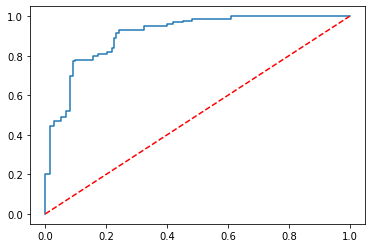

In [60]:
y_true = []
for i in y_test:
    if i == 0:
        y_true.append(0)
    else:
        y_true.append(1)

proba = mlp.predict_proba(x_test)[:,1]
fpr, tpr, _  = roc_curve(y_true, proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()